## Producers

Los Produces escriben los datos en los topics, ellos saben automáticamente en qué broker y partition escribir aunque haya algún broker caído.

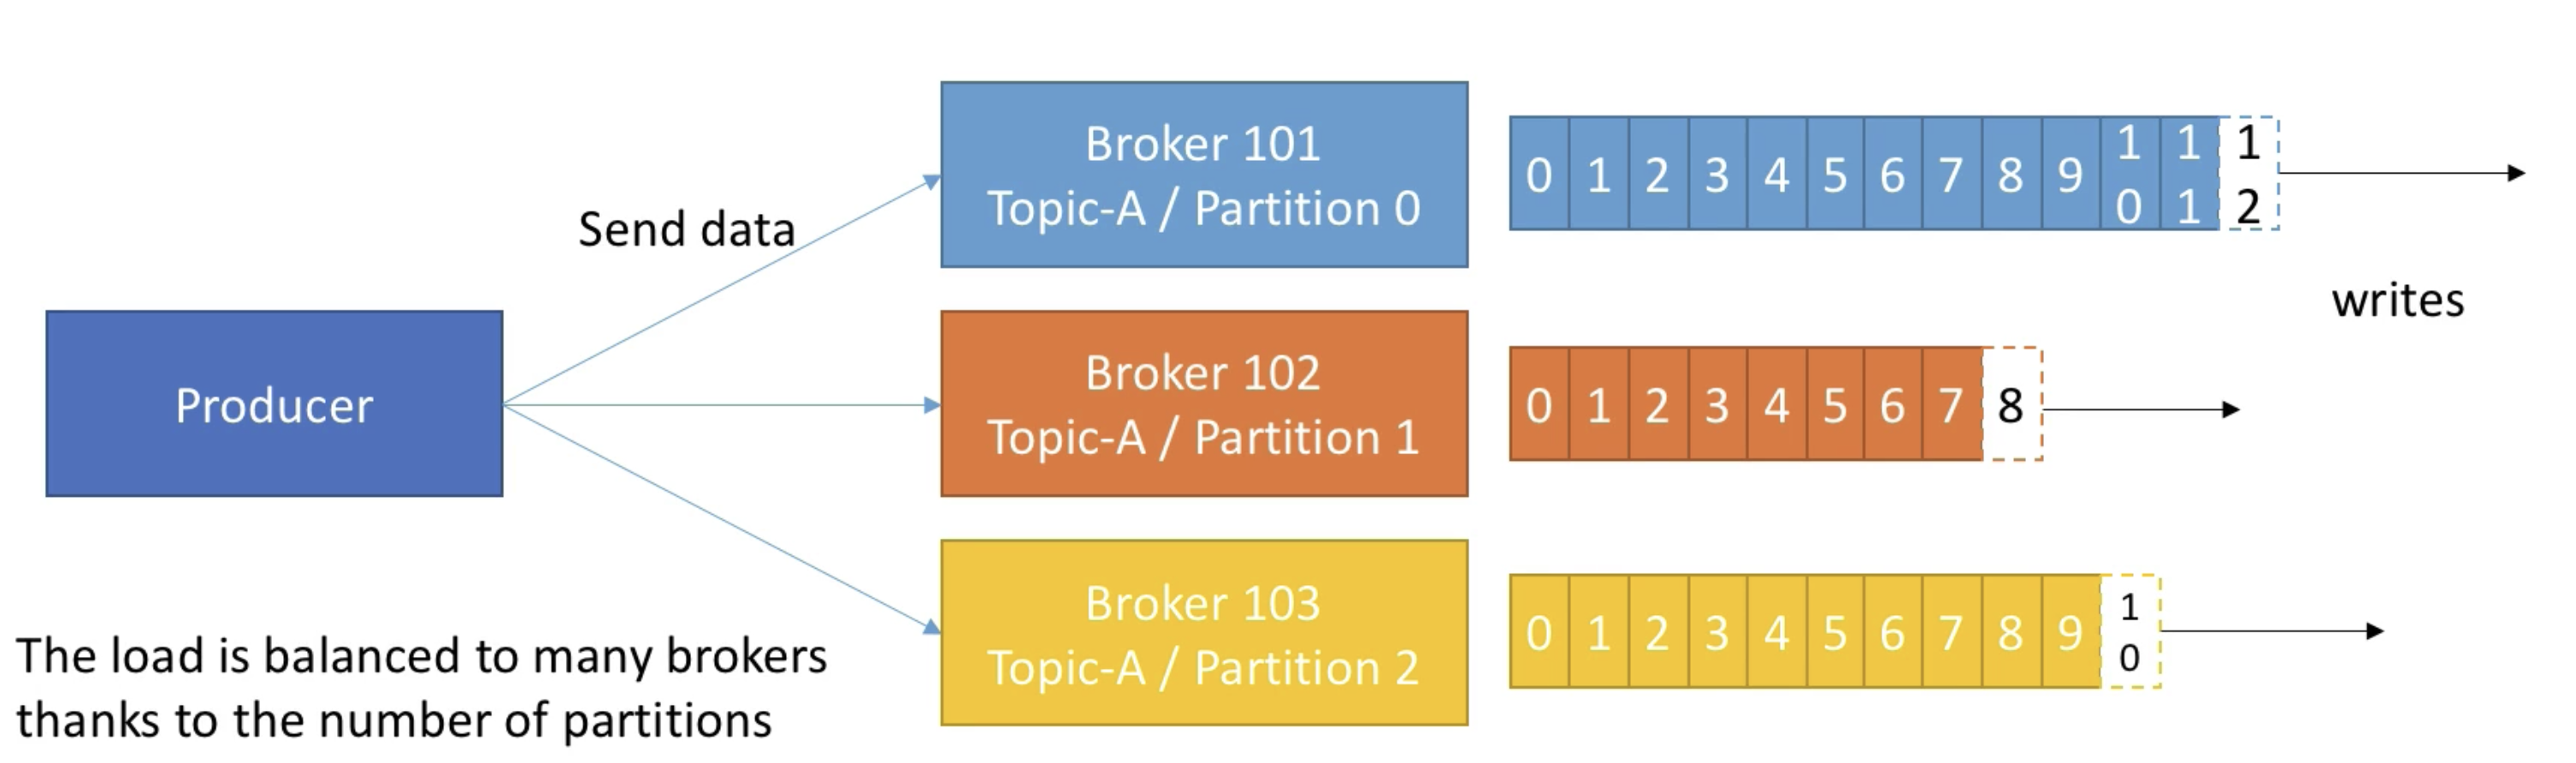

Los productores pueden recibir acks de escritura:
- ack=0: el productor no espera ack (posible perdida de datos)
- ack=1: el líder hace confirmación de datos pero no la replica. Hay una pérdida limitada de datos si se cae el líder y la replica no esta replicada
- acks=all: el líder y la replica hace confirmación (no hay perdida de datos)

Los productores pueden enviar una **key** en cada mensaje(string, int, etc...). Si key=null, los datos se envían de forma rotatoria. Si se tiene una key los mensajes que tenga esa key ira a la misma partición

## Consumers

Los Consumers leen los datos en los topics y de igual manera que los Producers saben automáticamente en que broker leer, aunque haya alguno caido. 

Los datos se leen en orden dentro de particiones, es decir lee el offset 1 antes que el 2. En ningún momento leerá antes el 2 que el 1.

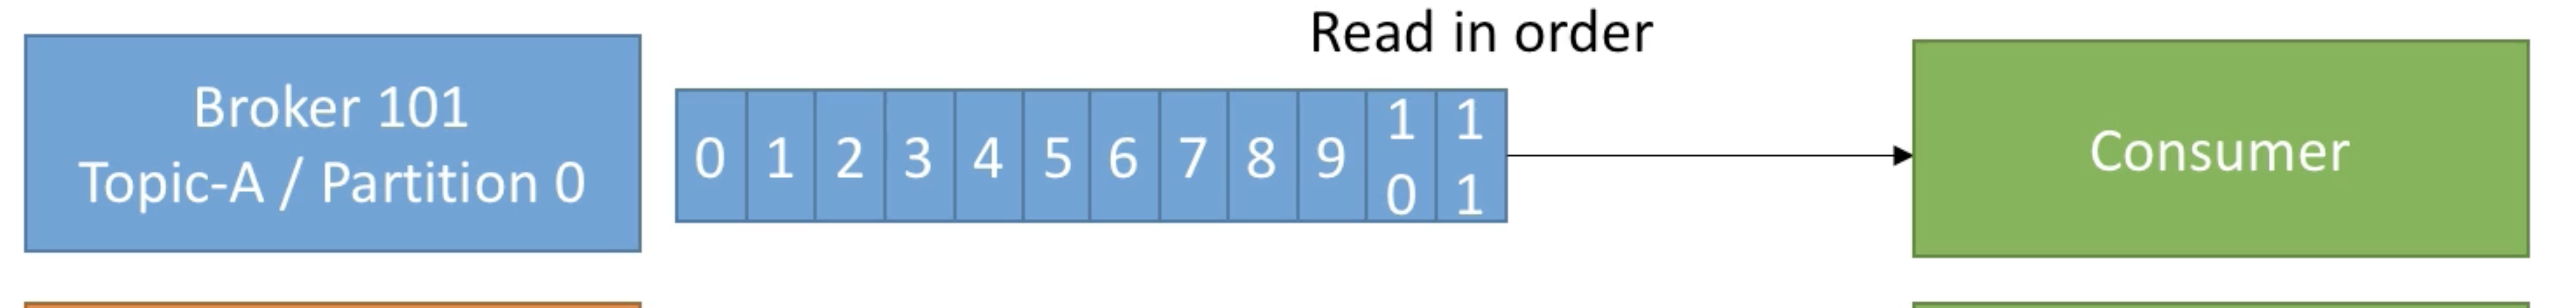

Por otro lado, si un consumer esta leyendo de dos particiones las va a leer en pararelo pero siempre en orden en la partición, por ejemplo leerá 3 mensajes de la partición 1(offset 1,2 y 3) y 2 mensajes de la partición 2 (offset 1,2), y cuando vuelva a la partición 1 empezará con el offset 1


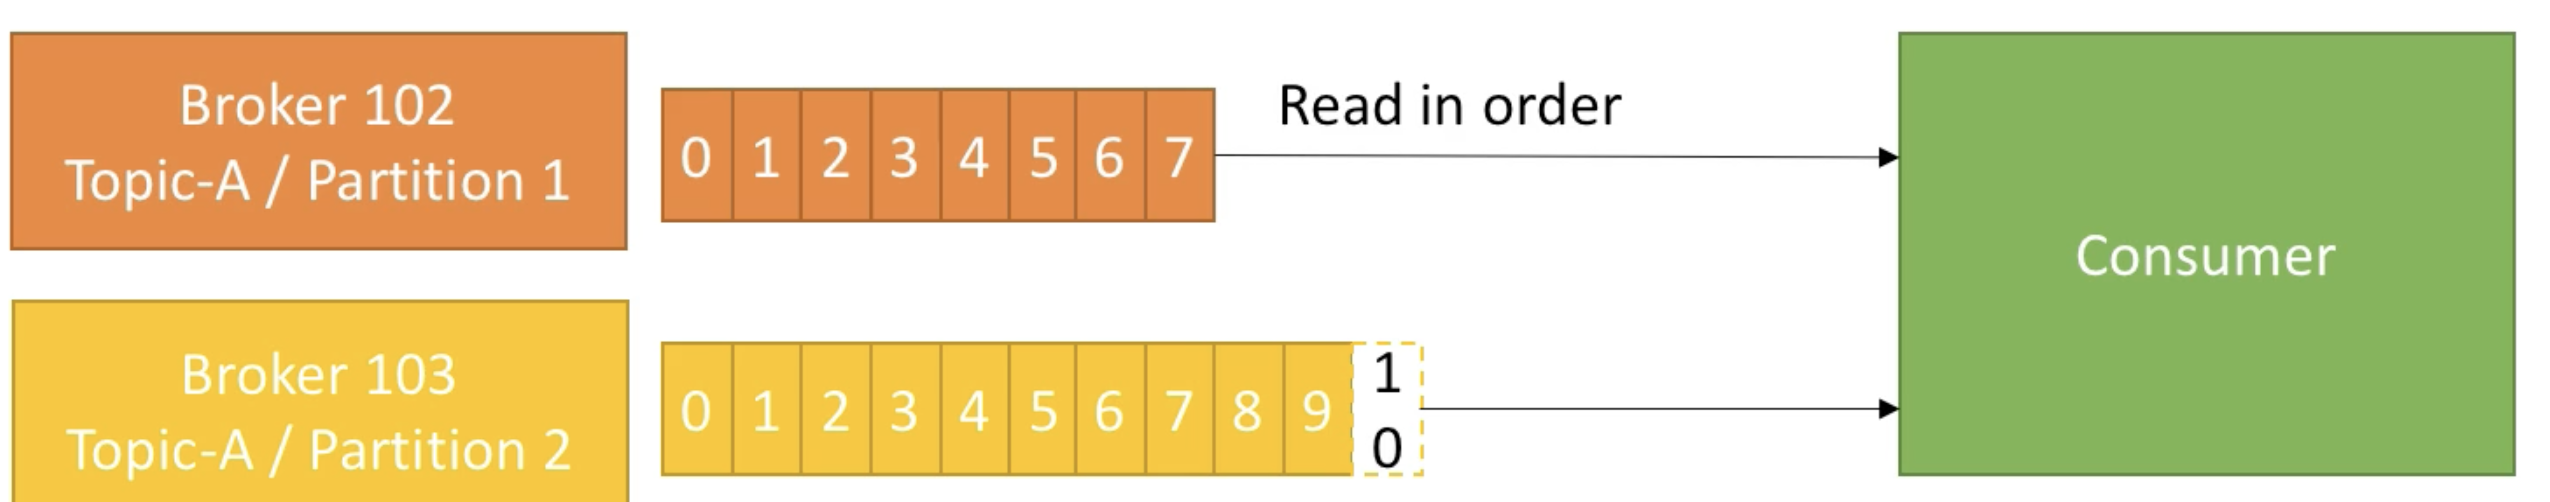

Los consumidores leen los datos en **consumer groups**, donde cada consumidor dentro de un grupo lee de particiones exclusivas. Un consumer group es una aplicación en Java con su función.

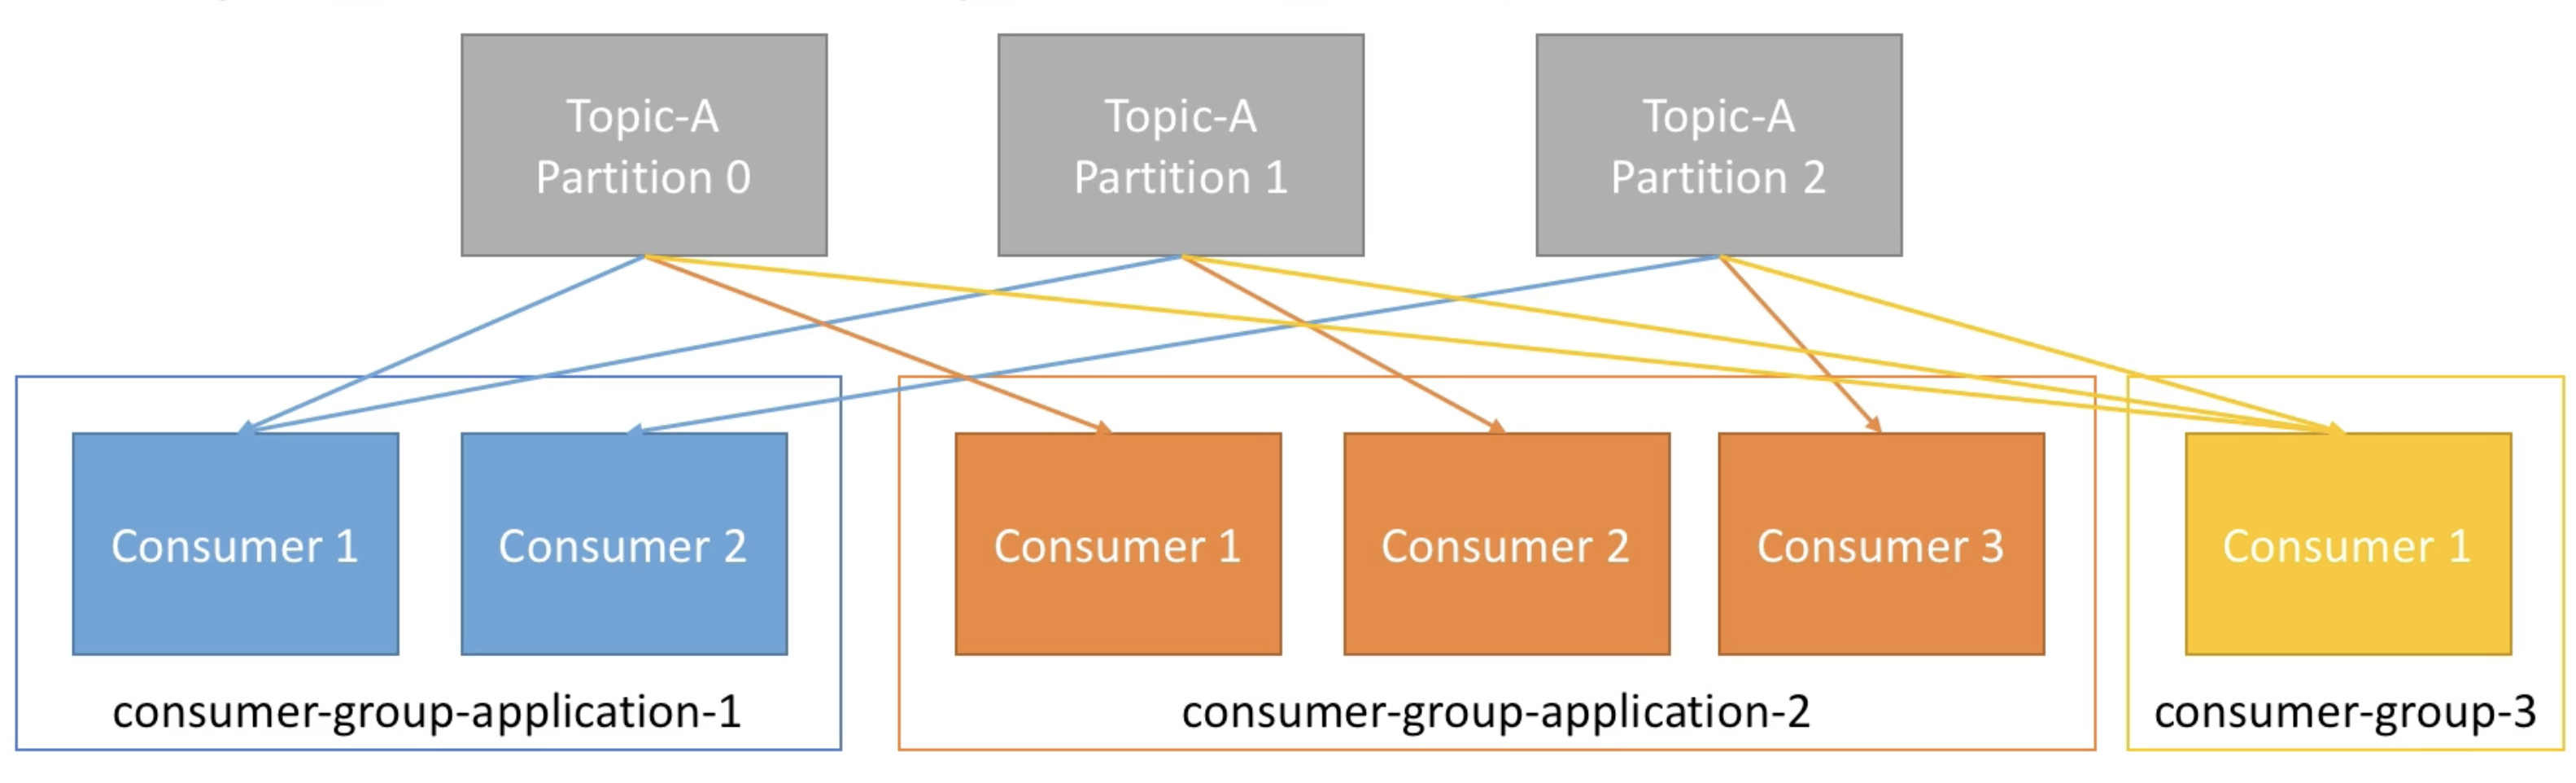

Al mismo tiempo si hay muchos consumidores puede ser que algunos estén inactivos. En este caso si se cae algún consumer activo, los que estén inactivos lo sustituiría

## Consumer offsets

kafka almacena los offset en las que un consumer group ha estado leyendo. Es una medida para hacer un check. Estos offsets commiteados se guarda en un topic llamado **__comsumer_offsets**. 

Esto es una medida de seguridad por si un consumidor muere, cuando vuelva ya sabe por donde se quedo y pueda volver a leer del mismo sitio que lo dejo. A la hora de activar esta opción hay 3 posibilidades:

- At most once: 
    - se commitea tan pronto como se recibe el mensaje.
    - Si hay un error el mensaje se perderá y no se volverá a leer
- At least once:
    - se commitea después de procesar el mensaje
    - Si hay un error y el consumidor cae el mensaje puede ser leído otra vez
    - Tiene el inconveniente de leer dos veces un mensaje
- Exactly once:
    - se garantiza que cada mensaje se conservará en Kafka exactamente una vez sin duplicados ni pérdida de datos, incluso cuando haya un fallo. Para lograr esto se tiene que tener una coordinación con Kafka y el cliente, por ejemplo Spark.



## Kafka broker discovery

Anteriormente se ha dicho que tanto Consumer como Producer saben a que broker y partición ir en todo momento. Esto es porque sólo tienes que conectarte a un broker, y estarás conectado a todo el cluster ya que cada broker tiene información de los topics y particiones (metadata). Todos los broker de kafka se llama también **boostrap server**.

El funcionamiento es el siguiente: 
1. Un Kafka client ya sea producer o consumer se conecta a cualquier broker
2. El broker le contesta con toda la información metadata de los brokers (Ips, nombres, etc...)
3. El cliente ya sabe automáticamente a que broker conectarse

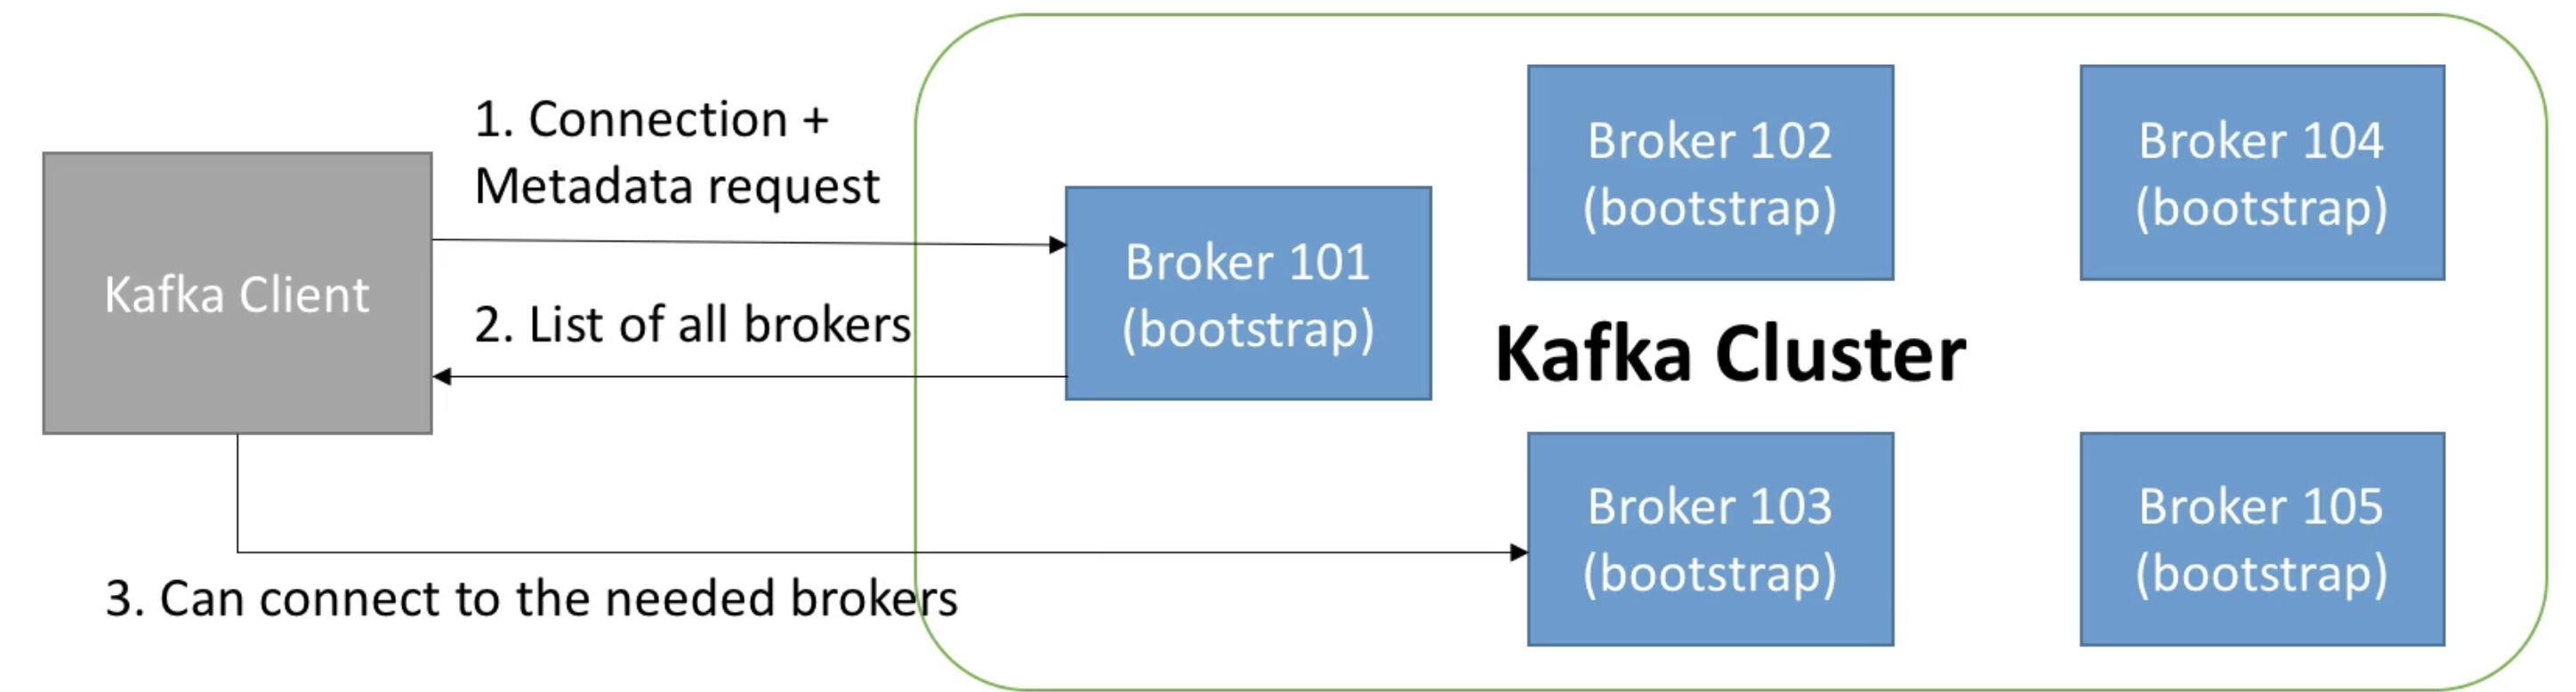



## Zookeeper

Es un servicio para la coordinación de procesos distribuido y altamente confiable que da soluciones a varios problemas de coordinación para grandes sistemas distribuidos.

Kafka no puede trabajar sin Zookeeper, antes de trabajar con Kafka se necesita iniciar Zookeeper. Unos ejemplos de kafka con Zookeeper:
- administra los brokers
- ayuda a realizar la elección del líder para las particiones
- envía notificaciones a kafka en caso de cambio (por ejemplo, un nuevo topic, un broker que muere, un broker que aparece, topics eliminados, etc.)

Los cluster de Zookeeper trabaja siempre con un número impar de servidores (3,5,7,etc.) y de igual manera también se asigna a si mismo un líder para escribir y **follower** (réplicas) para leer.

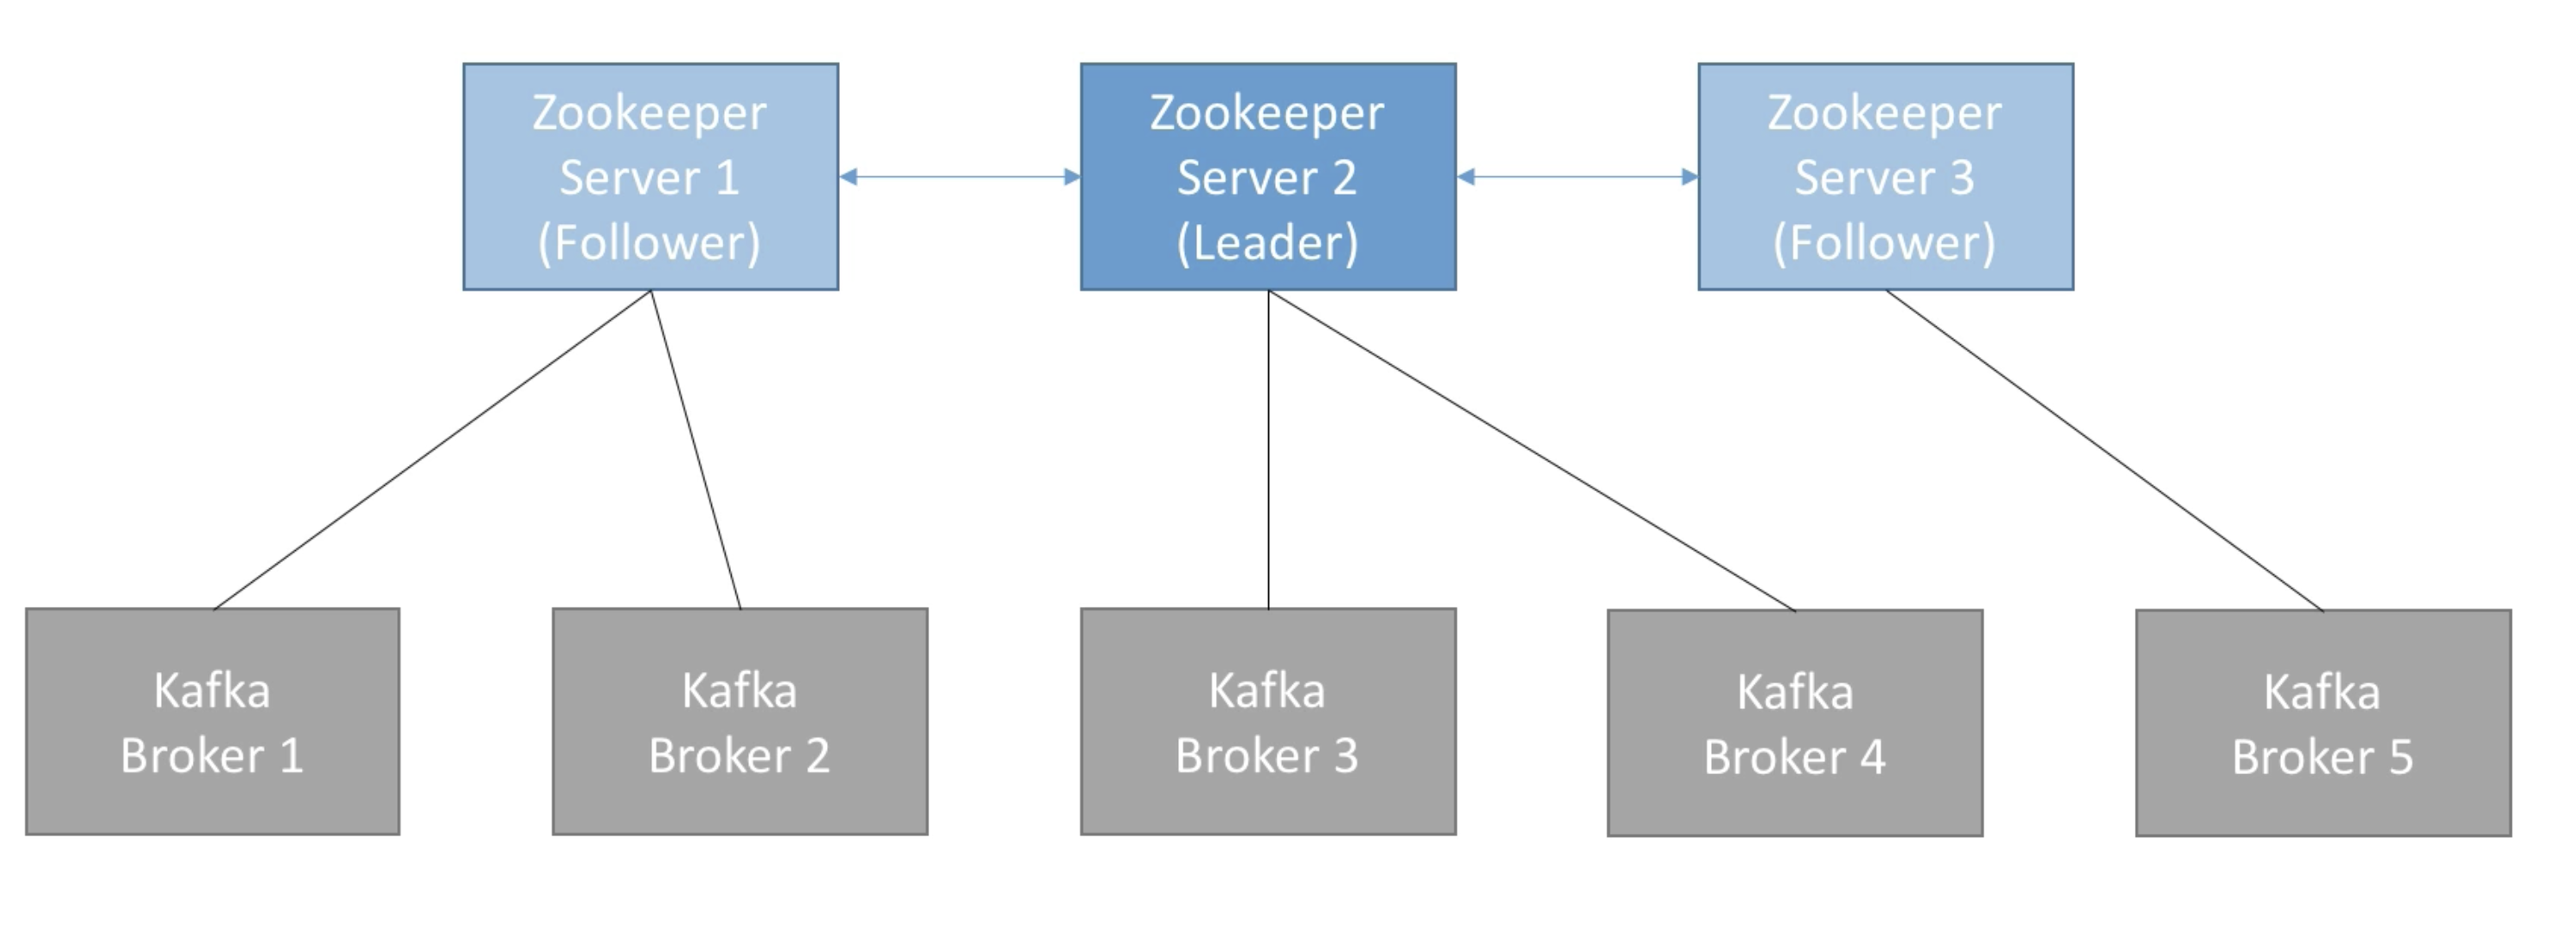



## Garantias de Kafka

- Los mensajes se añaden a topic-partition en el orden en que se envían
- Los consumidores leen los mensajes en el orden almacenado en un topic-partition
- Con un factor de replicación de N, los productores y consumidores pueden tolerar hasta N-1 brokers caídos. Por ello, un factor de replicación de 3 es una buena idea:
    - Permitir que un brokeer esté fuera de servicio por mantenimiento
    - Permitir que otro broker se caiga inesperadamente
- Mientras el número de particiones se mantenga constante para un topic (no hay nuevas particiones), la misma clave irá siempre a la misma partición


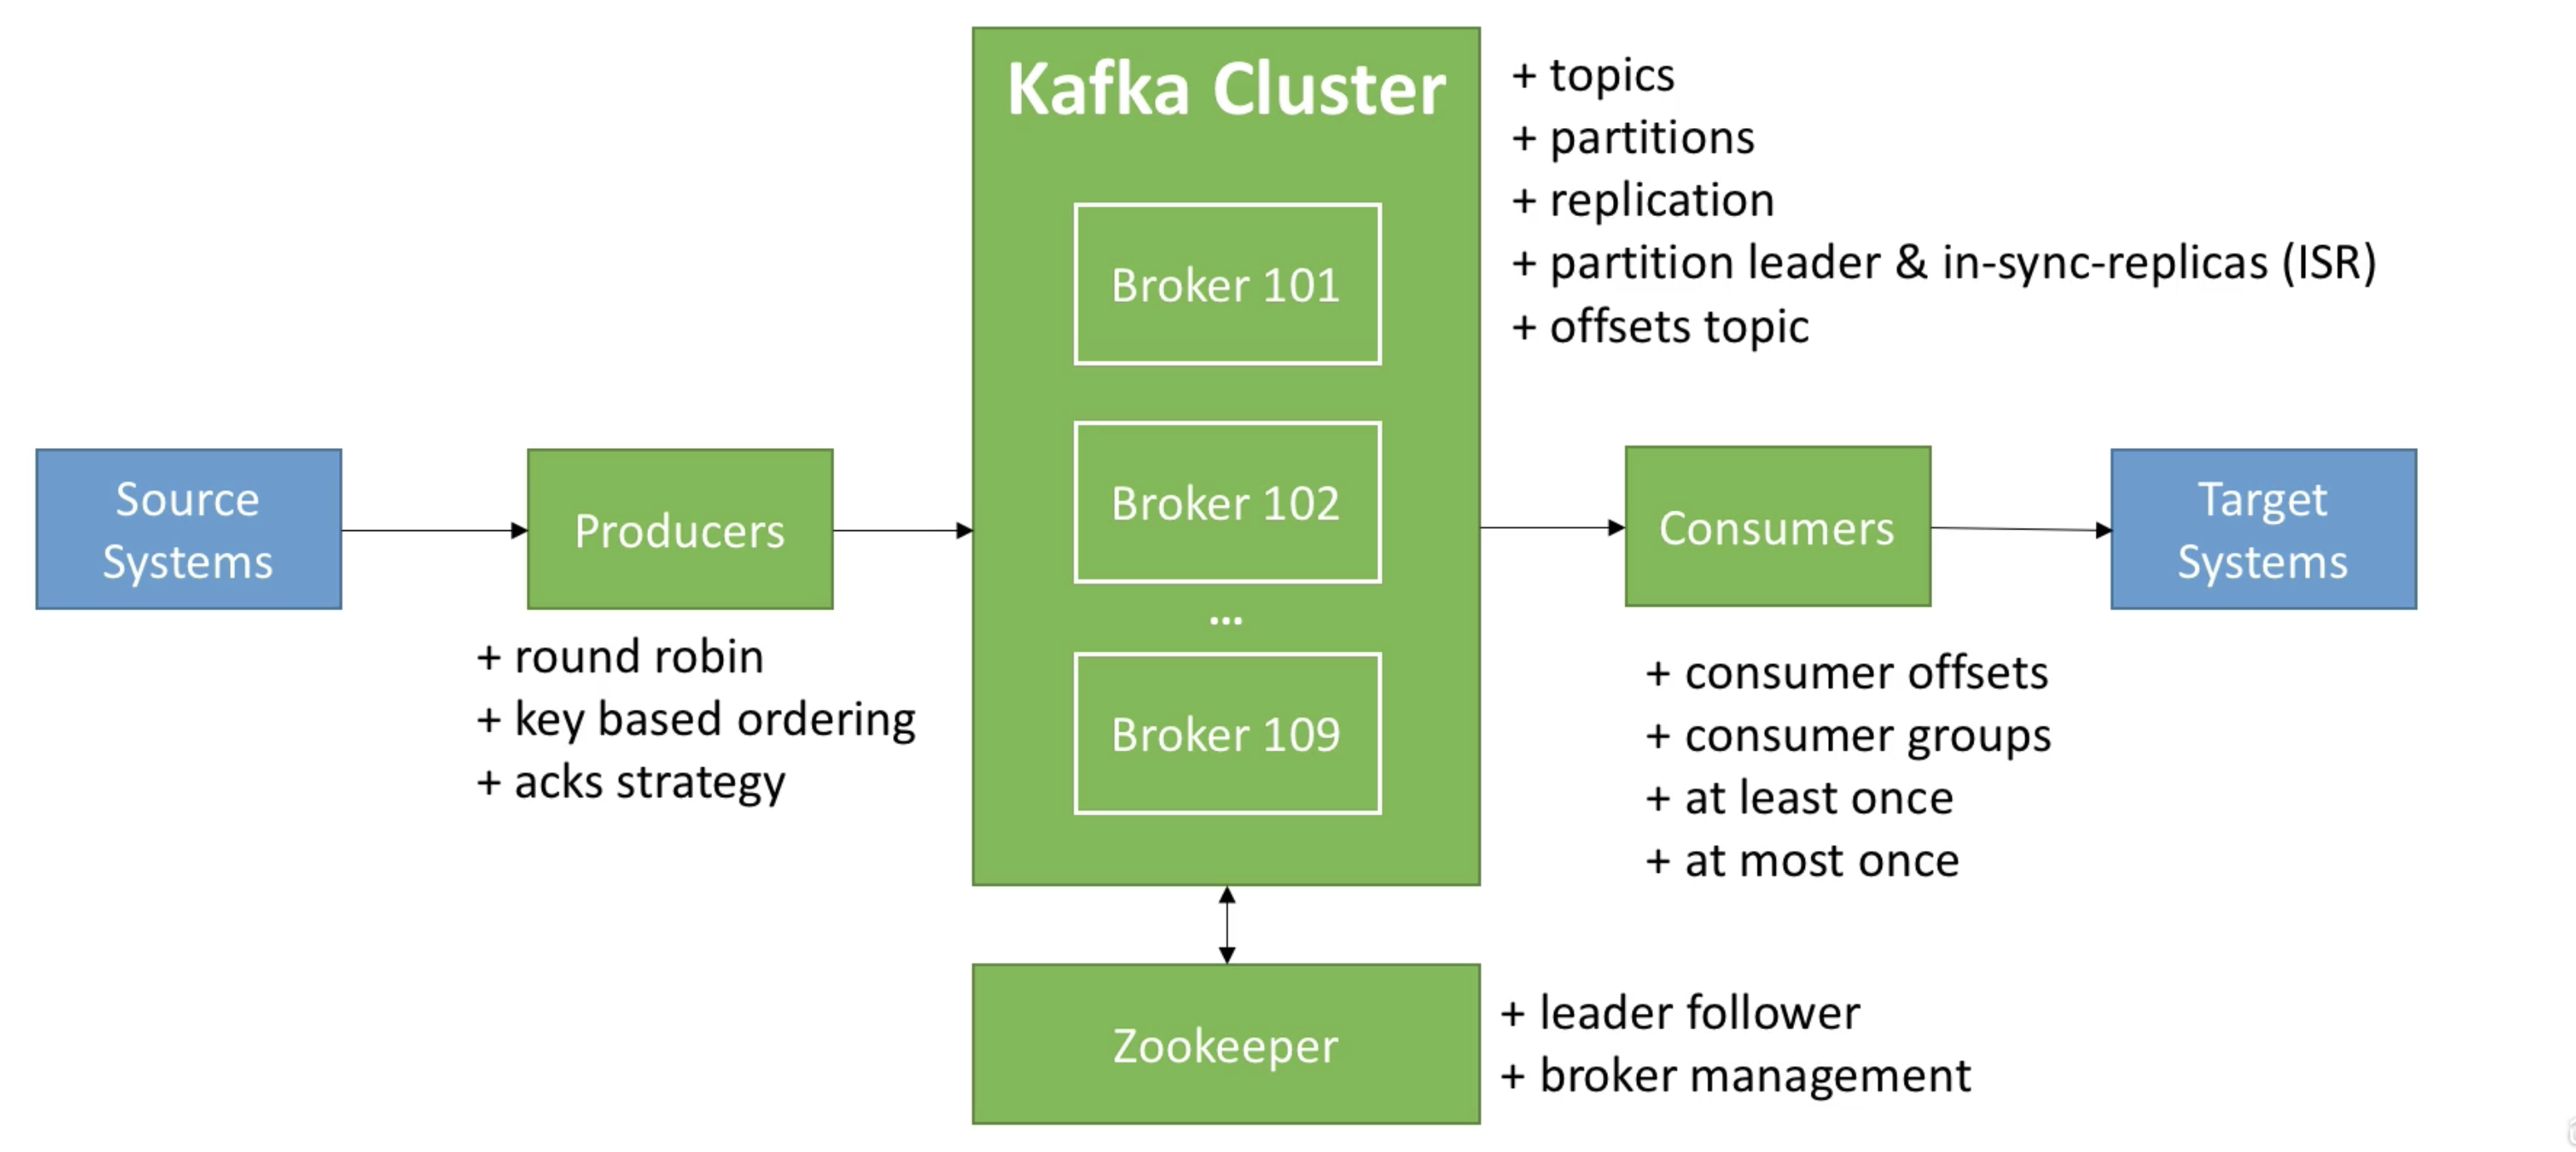